After loading the datset, I tackle the pre processing part by removing the duplicates first and checking the shape of the data. 
By plotting boxplots, I can clearly see many outliers in many of the columns. I use the z score method to remove outliers. Anything whose value is above 3 is dropped and the rows come down to 287.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


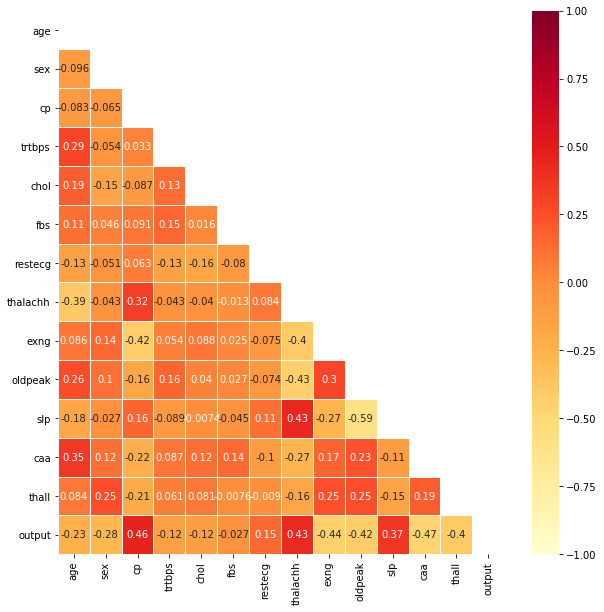

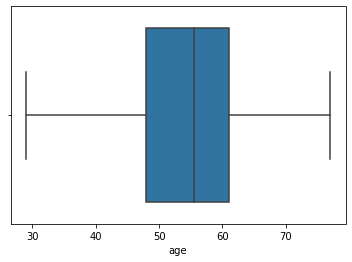

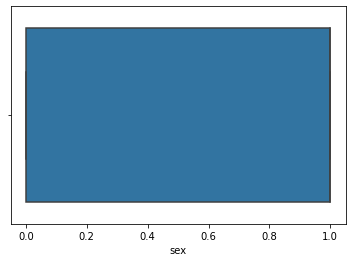

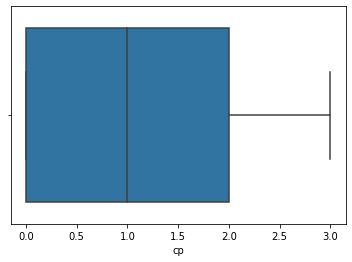

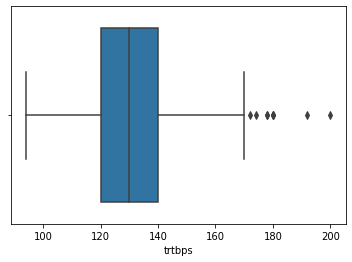

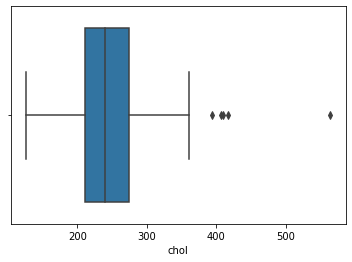

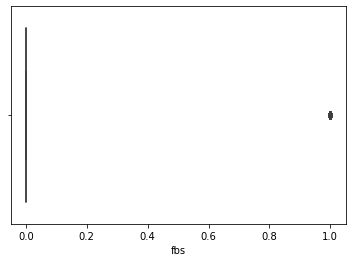

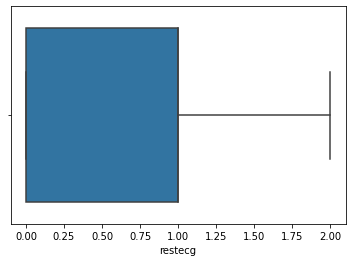

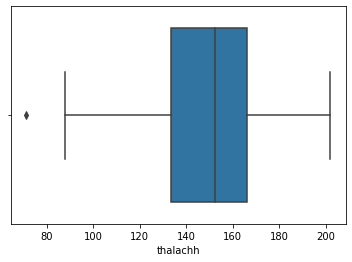

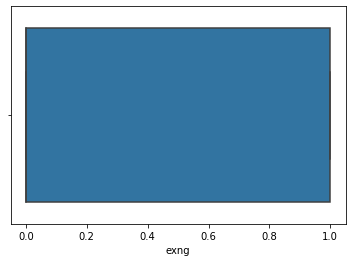

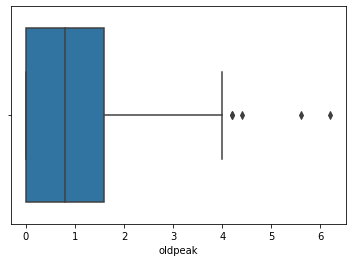

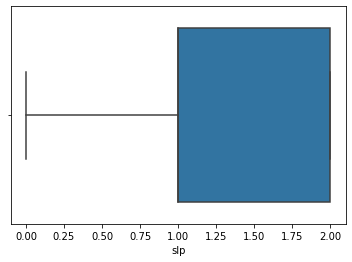

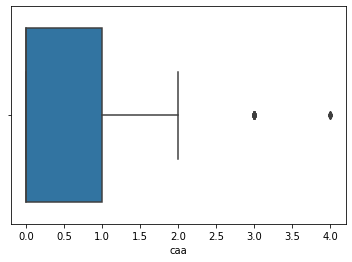

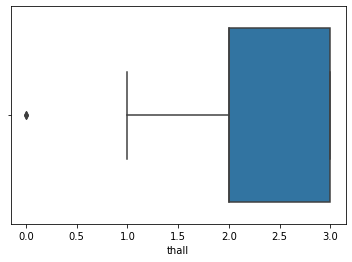

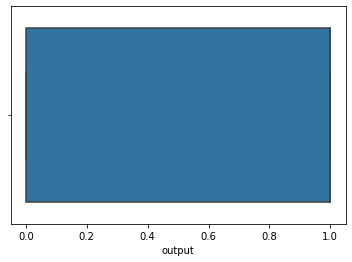

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stat

data = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
data.isnull().sum()
data.info()
data.describe()

data=pd.DataFrame(data)
data.shape
dupli_rows=data[data.duplicated()]

data=data.drop_duplicates()
data.shape

mask = np.triu(np.ones_like(data.corr()))
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(method="spearman"),annot=True,linewidth=.5,cmap="YlOrRd",vmin=-1,vmax=1,mask=mask,ax=ax)
plt.show()


for col in data.columns:
     sns.boxplot(x=data[col])
     plt.show()


from scipy import stats
z = np.abs(stats.zscore(data))
data=data[(z<3).all(axis=1)]
data.shape

X=data.iloc[:, :-1].values
y=data.iloc[:, -1].values

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [51]:
##logistic regression classifciation
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
logreg0=accuracy_score(y_test, y_pred)
logreg0

[[33  4]
 [ 5 30]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.875

In [52]:
##naivebayes

from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
nb0=accuracy_score(y_test, y_pred)
nb0

[[33  4]
 [ 4 31]]


0.8888888888888888

In [53]:
#svm

from sklearn.svm import SVC
classifier_svm=SVC(kernel="linear",random_state=0)
classifier_svm.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
suppvm0=accuracy_score(y_test, y_pred)
suppvm0

[[33  4]
 [ 5 30]]


0.875

In [54]:
#kernel svm

from sklearn.svm import SVC
classifier_ksvm=SVC(kernel="rbf",random_state=0)
classifier_ksvm.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_ksvm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ker_svm0=accuracy_score(y_test, y_pred)
ker_svm0

[[13 24]
 [ 5 30]]


0.5972222222222222

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier_dt.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt0=accuracy_score(y_test, y_pred)
dt0

[[26 11]
 [ 8 27]]


0.7361111111111112

In [56]:
##random forest

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
rf0=accuracy_score(y_test, y_pred)
rf0

[[33  4]
 [ 6 29]]


0.8611111111111112

In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
knn0=accuracy_score(y_test, y_pred)
knn0

[[22 15]
 [12 23]]


0.625

After obtaining all the accuracies, we notice that columns fbs, trtbps,chol and restecg have very low correlation to the output.
We check the new accuarcies after dropping these columns to see if there is any improvement.

In [58]:
data2 = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
dupli_rows=data2[data2.duplicated()]
data2=data2.drop_duplicates()
z = np.abs(stats.zscore(data2))
data3 = data2[(z<3).all(axis=1)]
data3.shape

(287, 14)

In [59]:
data3=data3.drop(["fbs","trtbps","chol","restecg"],axis=1)
X=data3.iloc[:, :-1].values
y=data3.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=0)

In [60]:
##logistic regression classifciation
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
logreg=accuracy_score(y_test, y_pred)
logreg

[[32  5]
 [ 4 31]]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.875

In [61]:
##naivebayes

from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
nb=accuracy_score(y_test, y_pred)
nb

[[33  4]
 [ 6 29]]


0.8611111111111112

In [62]:
#svm

from sklearn.svm import SVC
classifier_svm=SVC(kernel="linear",random_state=0)
classifier_svm.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
suppvm=accuracy_score(y_test, y_pred)
suppvm

[[31  6]
 [ 4 31]]


0.8611111111111112

In [63]:
#kernel svm

from sklearn.svm import SVC
classifier_ksvm=SVC(kernel="rbf",random_state=0)
classifier_ksvm.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_ksvm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
ker_svm=accuracy_score(y_test, y_pred)
ker_svm

[[23 14]
 [ 5 30]]


0.7361111111111112

In [64]:
#knn
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
knn=accuracy_score(y_test, y_pred)
knn

[[25 12]
 [10 25]]


0.6944444444444444

In [65]:
##decision tree

from sklearn.tree import DecisionTreeClassifier
classifier_dt=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier_dt.fit(X_train,y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
dt=accuracy_score(y_test, y_pred)
dt

[[27 10]
 [ 9 26]]


0.7361111111111112

In [66]:
##random forest

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
rf=accuracy_score(y_test, y_pred)
rf

[[32  5]
 [ 4 31]]


0.875

In [67]:
print("Accuracies after dropping columns are: \n","Logistic Regression Classification:",logreg*100,"\n","Naive-Bayes:",nb*100,"\n","SVM:",suppvm*100,"\n","Kernel SVM:",ker_svm*100,"\n","KNN:",knn*100,"\n","Decision Tree:",dt*100,"\n","Random Forest:",rf*100,"\n")

Accuracies after dropping columns are: 
 Logistic Regression Classification: 87.5 
 Naive-Bayes: 86.11111111111111 
 SVM: 86.11111111111111 
 Kernel SVM: 73.61111111111111 
 KNN: 69.44444444444444 
 Decision Tree: 73.61111111111111 
 Random Forest: 87.5 



In [68]:
print("Accuracies before dropping columns are: \n","Logistic Regression Classification:",logreg0*100,"\n","Naive-Bayes:",nb0*100,"\n","SVM:",suppvm0*100,"\n","Kernel SVM:",ker_svm0*100,"\n","KNN:",knn0*100,"\n","Decision Tree:",dt0*100,"\n","Random Forest:",rf0*100,"\n")


Accuracies before dropping columns are: 
 Logistic Regression Classification: 87.5 
 Naive-Bayes: 88.88888888888889 
 SVM: 87.5 
 Kernel SVM: 59.72222222222222 
 KNN: 62.5 
 Decision Tree: 73.61111111111111 
 Random Forest: 86.11111111111111 



After comapring both accuracies, we can see that kernel svm, KNN and decision tree classification models are not the best for this problem statement.
Before dropping the columns-
we see that Naive BAyes seems like a good fit with just a margin above Logistic classification. 

However, after dropping the columns,we can see that logistic regressions stands it ground, naive bayes performace slighlty decreases while random forest slightly improves its performance.
We can perhaps conclude that Logistic classification is the best out of all due to its consistent accuracy, followed by random forest.